In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [94]:
df=pd.read_excel('EastWestAirlines.xlsx')

In [3]:
df


East-West Airlines is trying to learn more about its customers.  Key issues are their  \
0   flying patterns, earning and use of frequent f...                                      
1   card.  The task is to identify customer segmen...                                      
2                                                 NaN                                      
3                                                 NaN                                      
4   Source: Based upon real business data; company...                                      
5              (c) 2016 Galit Shmueli and Peter Bruce                                      
6                                                 NaN                                      
7                                                 NaN                                      
8                                          Field Name                                      
9                                                 ID#                                      
10                                            Balance                                      
11                                         Qual_miles                                      
12                                          cc1_miles                                      
13                                          cc2_miles                                      
14                                          cc3_miles                                      
15                                 note:  miles bins:                                      
16                                                NaN                                      
17                                                NaN                                      
18                                                NaN                                      
19                                                NaN                                      
20                                        Bonus_miles                                      
21                                        Bonus_trans                                      
22                                  Flight_miles_12mo                                      
23                                    Flight_trans_12                                      
24                                  Days_since_enroll                                      
25                                             Award?                                      

   Unnamed: 1       Unnamed: 2                         Unnamed: 3  \
0         NaN              NaN                                NaN   
1         NaN              NaN                                NaN   
2         NaN              NaN                                NaN   
3         NaN              NaN                                NaN   
4         NaN              NaN                                NaN   
5         NaN              NaN                                NaN   
6         NaN              NaN                                NaN   
7         NaN              NaN                                NaN   
8   Data Type  Max Data Length  Raw Data or Telcom Created Field?   
9      NUMBER              NaN                             Telcom   
10     NUMBER                8                                Raw   
11     NUMBER                8                                Raw   
12       CHAR                1                                Raw   
13       CHAR                1                                Raw   
14       CHAR                1                                Raw   
15        NaN              NaN                                NaN   
16        NaN              NaN                                NaN   
17        NaN              NaN                                NaN   
18        NaN              NaN                                NaN   
19        NaN              NaN                                NaN   
20     NUMBER              NaN                                Raw   


In [4]:
df.head()

East-West Airlines is trying to learn more about its customers.  Key issues are their  \
0  flying patterns, earning and use of frequent f...                                      
1  card.  The task is to identify customer segmen...                                      
2                                                NaN                                      
3                                                NaN                                      
4  Source: Based upon real business data; company...                                      

  Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  
0        NaN        NaN        NaN        NaN  
1        NaN        NaN        NaN        NaN  
2        NaN        NaN        NaN        NaN  
3        NaN        NaN        NaN        NaN  
4        NaN        NaN        NaN        NaN

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column                                                                                 Non-Null Count  Dtype 
---  ------                                                                                 --------------  ----- 
 0   East-West Airlines is trying to learn more about its customers.  Key issues are their  18 non-null     object
 1   Unnamed: 1                                                                             13 non-null     object
 2   Unnamed: 2                                                                             6 non-null      object
 3   Unnamed: 3                                                                             13 non-null     object
 4   Unnamed: 4                                                                             18 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB


In [6]:
df.describe()

East-West Airlines is trying to learn more about its customers.  Key issues are their  \
count                                                  18                                      
unique                                                 18                                      
top     flying patterns, earning and use of frequent f...                                      
freq                                                    1                                      

       Unnamed: 1  Unnamed: 2 Unnamed: 3   Unnamed: 4  
count          13           6         13           18  
unique          3           3          3           18  
top        NUMBER           1        Raw  Description  
freq            9           3          9            1

In [7]:
df.isnull().sum()

East-West Airlines is trying to learn more about its customers.  Key issues are their     8
Unnamed: 1                                                                               13
Unnamed: 2                                                                               20
Unnamed: 3                                                                               13
Unnamed: 4                                                                                8
dtype: int64

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

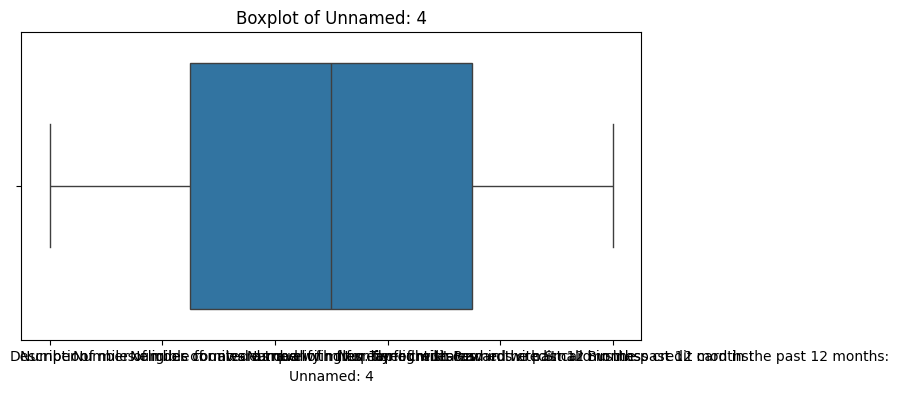

In [10]:
for feature in df.columns:
    plt.figure(figsize=(8, 4))

    if pd.api.types.is_numeric_dtype(df[feature]):
        sns.boxplot(y=df[feature])
else:
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

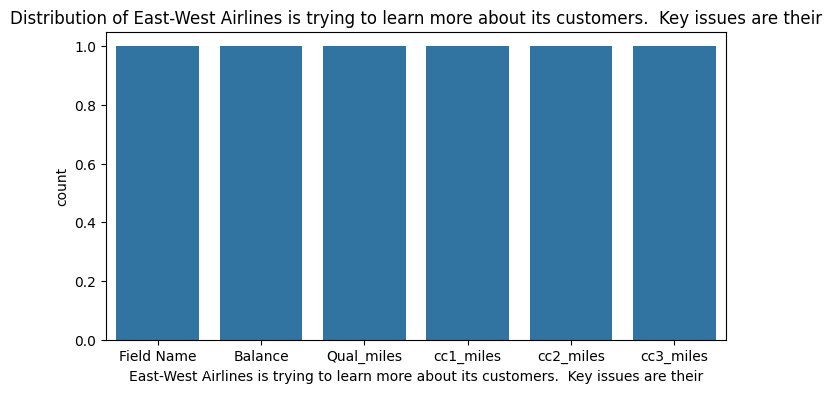

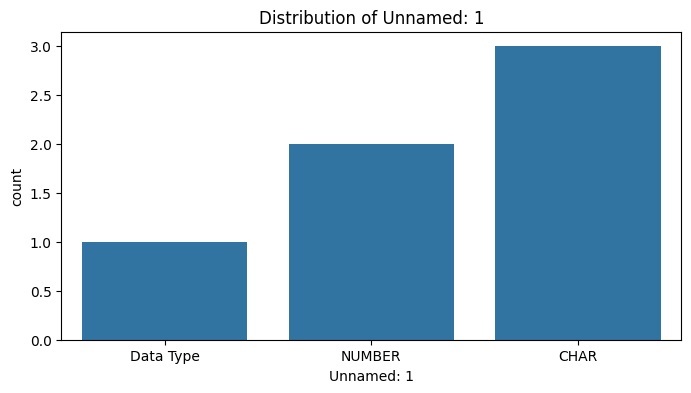

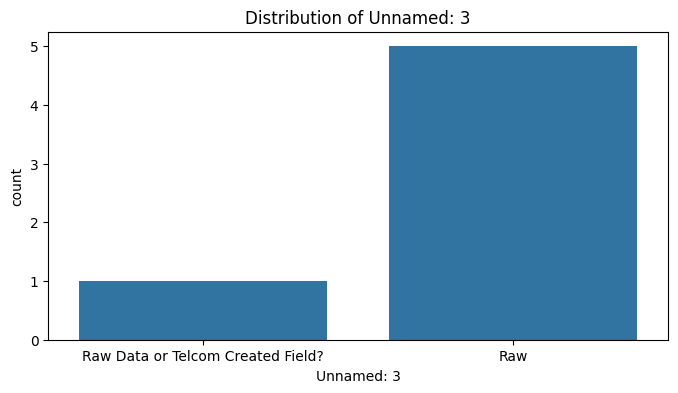

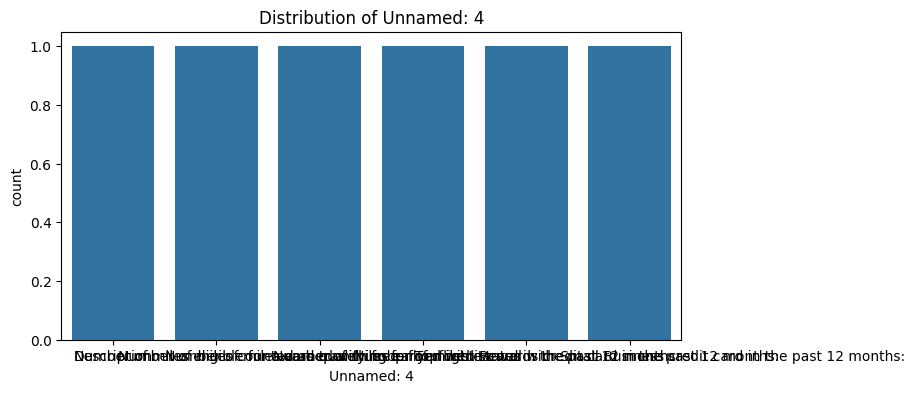

In [54]:
# Visualize the distribution of individual features
for feature in df.columns:
    plt.figure(figsize=(8, 4))

    if pd.api.types.is_numeric_dtype(df[feature]):
        sns.boxplot(y=df[feature])
    else:
        sns.countplot(x=df[feature])

    plt.title(f'Distribution of {feature}')
    plt.show()

In [38]:
print(df.columns)

Index(['East-West Airlines is trying to learn more about its customers.  Key issues are their',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],
      dtype='object')


In [213]:
for col in df.select_dtypes(include=['object']).columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    except ValueError:
        print(f"Could not convert column '{col}' to numeric.")


numeric_df = df.select_dtypes(include=np.number)
sns.pairplot(numeric_df)
plt.show()

In [189]:
scaler = StandardScaler()
# Impute NaN values with the mean of each column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # Replace 'mean' with other strategies if needed

# Ensure numeric_df has more than one column for clustering
if numeric_df.shape[1] < 2:
    raise ValueError("numeric_df needs at least 2 columns for clustering")

numeric_df_imputed = imputer.fit_transform(numeric_df)

scaled_df = scaler.fit_transform(numeric_df_imputed)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['East-West Airlines is trying to learn more about its customers.  Key issues are their'
 'Unnamed: 1' 'Unnamed: 3' 'Unnamed: 4']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


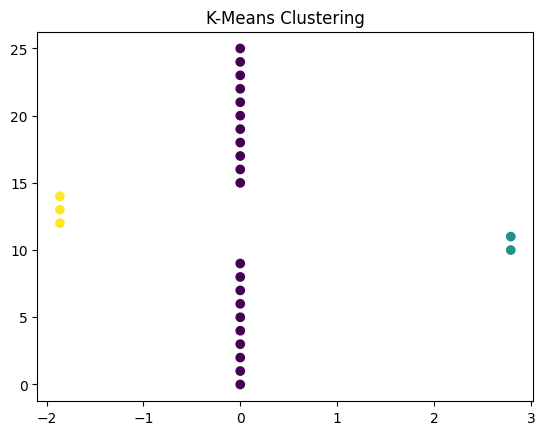

In [194]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)
if scaled_df.shape[1] >= 2:
    plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=kmeans_labels)
else:
    plt.scatter(scaled_df[:, 0], range(len(scaled_df)), c=kmeans_labels)
plt.title('K-Means Clustering')
plt.show()

In [195]:
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(scaled_df)
if scaled_df.shape[1] >= 2:
    plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=hierarchical_labels)
else:
    plt.scatter(scaled_df[:, 0], range(len(scaled_df)), c=hierarchical_labels)
plt.title('Hierarchical Clustering')
plt.show()


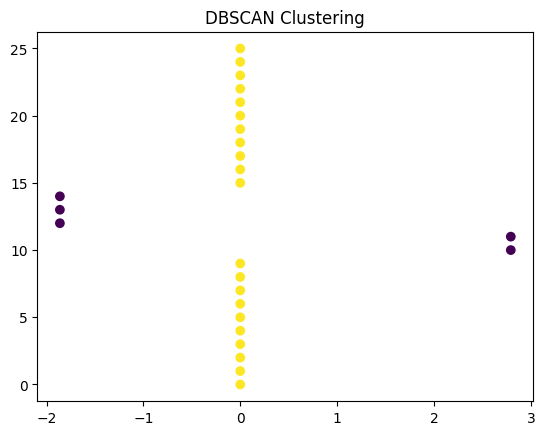

In [196]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_df)
if scaled_df.shape[1] >= 2:
    plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=dbscan_labels)
else:
    plt.scatter(scaled_df[:, 0], range(len(scaled_df)), c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()


For n_clusters = 2, the average silhouette_score is : 0.8458041958041959


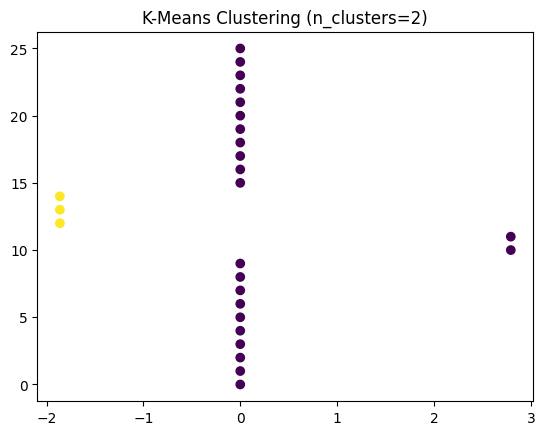

For n_clusters = 3, the average silhouette_score is : 1.0


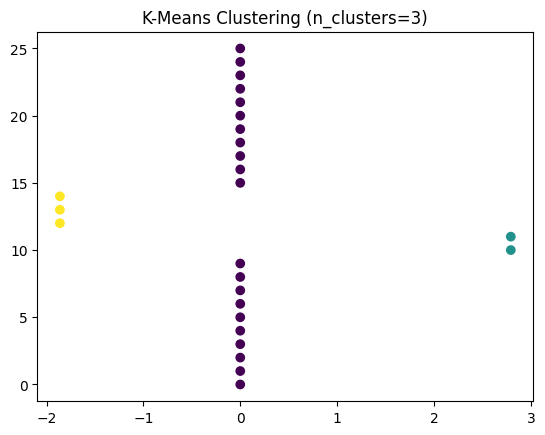

For n_clusters = 4, the average silhouette_score is : 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


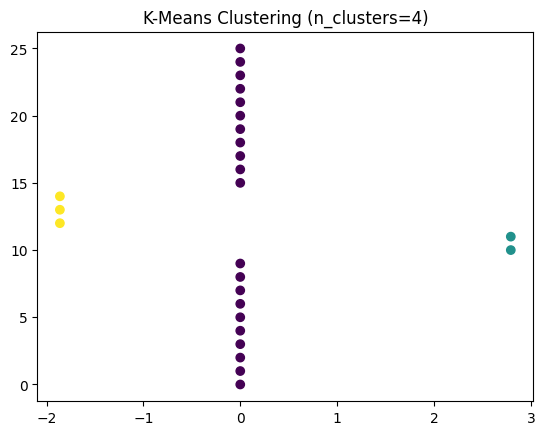

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


For n_clusters = 5, the average silhouette_score is : 1.0


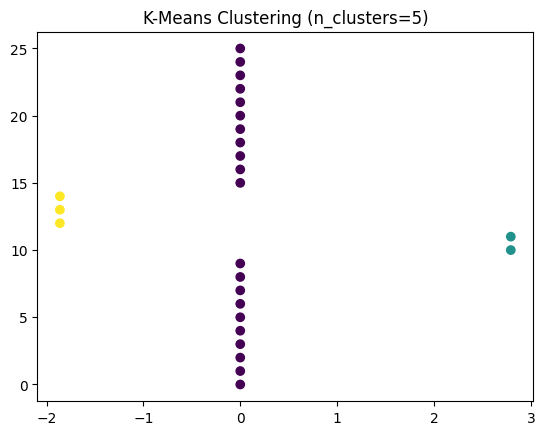

In [198]:
for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(scaled_df)
    silhouette_avg = silhouette_score(scaled_df, kmeans_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")


    if scaled_df.shape[1] >= 2:
        plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=kmeans_labels)
    else:
        plt.scatter(scaled_df[:, 0], range(len(scaled_df)), c=kmeans_labels)
    plt.title(f'K-Means Clustering (n_clusters={n_clusters})')
    plt.show()


For linkage = ward, the average silhouette_score is : 1.0


For linkage = complete, the average silhouette_score is : 1.0


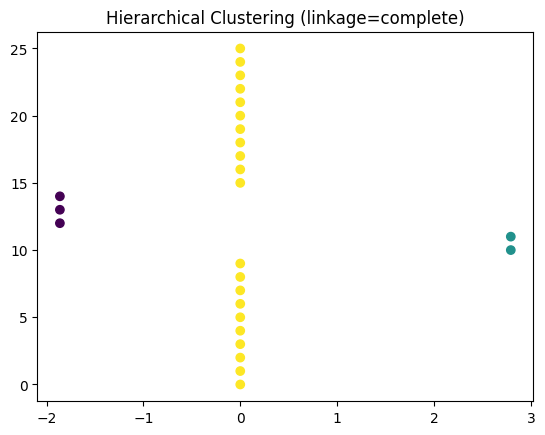

For linkage = average, the average silhouette_score is : 1.0


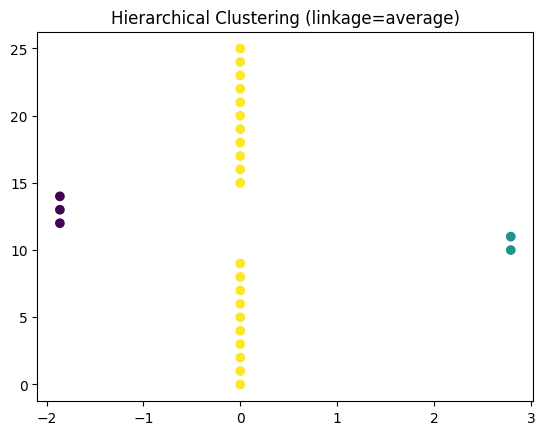

For linkage = single, the average silhouette_score is : 1.0


In [202]:
linkage_criteria = ['ward', 'complete', 'average', 'single']
for linkage in linkage_criteria:
    hierarchical = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    hierarchical_labels = hierarchical.fit_predict(scaled_df)
    silhouette_avg = silhouette_score(scaled_df, hierarchical_labels)
    print(f"For linkage = {linkage}, the average silhouette_score is : {silhouette_avg}")

    if scaled_df.shape[1] >= 2:
        plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=hierarchical_labels)
    else:
        plt.scatter(scaled_df[:, 0], range(len(scaled_df)), c=hierarchical_labels)
    plt.title(f'Hierarchical Clustering (linkage={linkage})')
    plt.show()

For eps = 0.2, min_samples = 3, the average silhouette_score is : 1.0


For eps = 0.2, min_samples = 5, the average silhouette_score is : 0.7692307692307693


For eps = 0.2, min_samples = 7, the average silhouette_score is : 0.7692307692307693


For eps = 0.5, min_samples = 3, the average silhouette_score is : 1.0


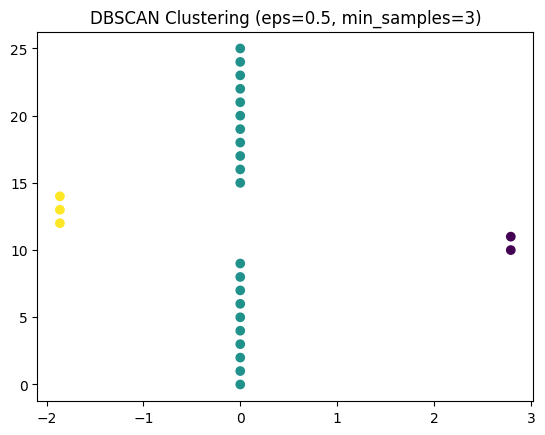

For eps = 0.5, min_samples = 5, the average silhouette_score is : 0.7692307692307693


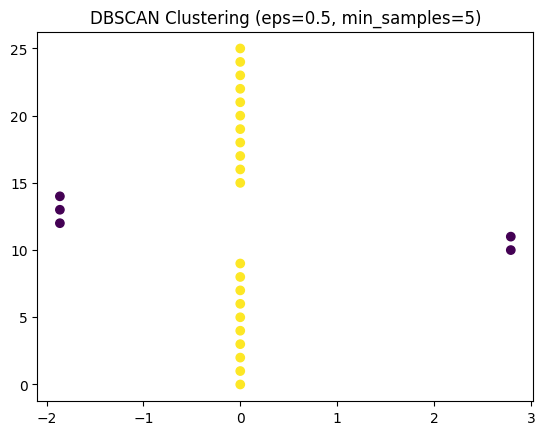

For eps = 0.5, min_samples = 7, the average silhouette_score is : 0.7692307692307693


For eps = 1.0, min_samples = 3, the average silhouette_score is : 1.0


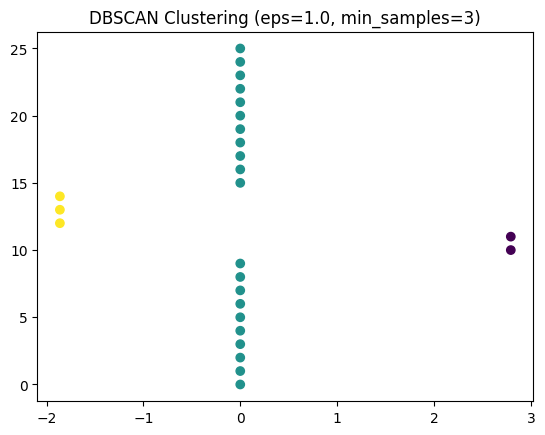

For eps = 1.0, min_samples = 5, the average silhouette_score is : 0.7692307692307693


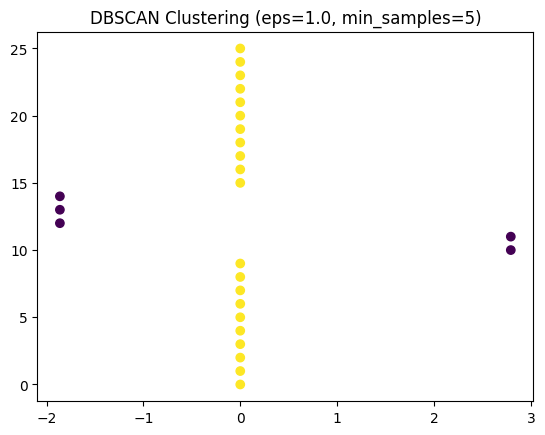

For eps = 1.0, min_samples = 7, the average silhouette_score is : 0.7692307692307693


In [201]:
eps_values = [0.2, 0.5, 1.0]
min_samples_values = [3, 5, 7]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(scaled_df)

        # Handle cases where DBSCAN assigns all points to noise (-1)
        if len(set(dbscan_labels)) > 1:
            silhouette_avg = silhouette_score(scaled_df, dbscan_labels)
            print(f"For eps = {eps}, min_samples = {min_samples}, the average silhouette_score is : {silhouette_avg}")
            if scaled_df.shape[1] >= 2:
                plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=dbscan_labels)
            else:
                plt.scatter(scaled_df[:, 0], range(len(scaled_df)), c=dbscan_labels)
            plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
            plt.show()
        else:
            print(f"For eps = {eps}, min_samples = {min_samples}, all points are noise. Skipping silhouette score calculation.")

K-Means: Aims to partition data into clusters with similar means. It's sensitive to initializations and may not perform well with complex cluster shapes.

Hierarchical: Builds a hierarchy of clusters, allowing for different levels of granularity. Linkage methods influence cluster formation.

DBSCAN: Identifies clusters based on density, excelling at finding clusters of arbitrary shapes and handling outliers. Sensitive to parameter choices.



In [216]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:

Optimal DBSCAN Silhouette Score: 0.7692307692307693


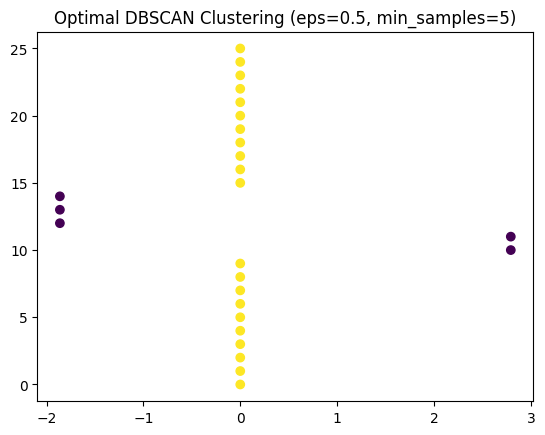

In [204]:
best_eps = 0.5
best_min_samples = 5

dbscan_optimal = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels_optimal = dbscan_optimal.fit_predict(scaled_df)

# Evaluate the optimal DBSCAN clustering
silhouette_avg_optimal = silhouette_score(scaled_df, dbscan_labels_optimal)
print(f"Optimal DBSCAN Silhouette Score: {silhouette_avg_optimal}")

# Visualize the optimal DBSCAN clustering
if scaled_df.shape[1] >= 2:
    plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=dbscan_labels_optimal)
else:
    plt.scatter(scaled_df[:, 0], range(len(scaled_df)), c=dbscan_labels_optimal)
plt.title(f'Optimal DBSCAN Clustering (eps={best_eps}, min_samples={best_min_samples})')
plt.show()


In [212]:
print("Silhouette Score (K-Means):", silhouette_score(scaled_df, kmeans_labels))
print("Silhouette Score (Hierarchical):", silhouette_score(scaled_df, hierarchical_labels))
print("Silhouette Score (DBSCAN):", silhouette_score(scaled_df, dbscan_labels))


Silhouette Score (K-Means): 1.0
Silhouette Score (Hierarchical): 1.0
Silhouette Score (DBSCAN): 0.7692307692307693
